In [3]:
#pandas import 하기
import pandas as pd

# 1.Series 생성


## (1) 리스트로 생성

In [ ]:
animals = ['tiger','bears','moose']
s1 = pd.Series(animals)
s1

0    tiger
1    bears
2    moose
dtype: object

In [ ]:
type(s1)

pandas.core.series.Series

## (2) ndarray로 생성

In [ ]:
import numpy as np

a=np.array(['tiger','bears','moose'])

## (3) 딕셔너리로 생성

In [ ]:
dic = {'a':1, 'b':2, 'c':3}
s3 = pd.Series(dic)
s3

a    1
b    2
c    3
dtype: int64

## (4) Series() 함수로 생성

pandas.Series(data, index, dtype, copy) 

 

data: Series를 구성할 데이터ㅡ Series, list, ndarray, dictionary, constants

index: 인덱스 값을 지정해줄 수 있다

dtype: 각 항목에 적용될 자료형 

copy: 얕은 복사를 할 것인지 깊은 복사를 할 것인지 정함. True or False (Series로 Series를 만들면 copy가 동작함)

In [ ]:
s4 = pd.Series([1,2,3],index = ['z','b','c'], dtype = 'int32')
s4

z    1
b    2
c    3
dtype: int32

In [ ]:
sa = pd.Series([1,2,3])
s = pd.Series(sa, copy = False)  # sa를 깊은 복사
s

0    1
1    2
2    3
dtype: int64

In [ ]:
sa[0] = 0  # 0번째 데이터를 1에서 0으로 변경
print(sa)
print(s)  # sa가 변경되었으므로 s도 변경됨

0    0
1    2
2    3
dtype: int64
0    0
1    2
2    3
dtype: int64


In [ ]:
sa = pd.Series([1,2,3])
s = pd.Series(sa, copy=True)
s

0    1
1    2
2    3
dtype: int64

# 2.DaraFrame 생성

## (1) ndarray로 생성

In [ ]:
arr = np.array([[1,2,3],[4,5,6]])
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# DataFrame의 형태
a = pd.DataFrame(arr)  
a

,0,1,2
0,1,2,3
1,4,5,6


In [ ]:
type(a)

pandas.core.frame.DataFrame

In [ ]:
# 인덱스를 줌
a = pd.DataFrame(arr, index = ['a','b'])  
a

,0,1,2
a,1,2,3
b,4,5,6


In [ ]:
# 인덱스를 줌 & 열머리값을 줌
# pd.DataFrame(data,index,columns)
a = pd.DataFrame(arr, index=['a','b'], columns =['가','나','다'])  
a

,가,나,다
a,1,2,3
b,4,5,6


## (2) 딕셔너리로 생성

In [ ]:
# key : 열머리값  values : series
dic = {'a':[1,3], 'b': [1,2], 'c':[2,4]}
pd.DataFrame(dic)

,a,b,c
0,1,1,2
1,3,2,4


## (3) Series로 생성

In [ ]:
# pd.Series(data, index) >> 이 때 열머리값은 존재x
s = pd.Series(['London','Seoul','Washington'],index = ['UK','Korea','US'])
s

UK           London
Korea         Seoul
US       Washington
dtype: object

In [ ]:
pd.DataFrame(s)

,0
UK,London
Korea,Seoul
US,Washington


In [ ]:
# pd.Series(key >> index, values >> data)
s = pd.Series({'UK': 'London', 'Korea':'Seoul','US':'Washington'})

## (4) DataFrame() 함수로 생성

copy: DataFrame이나 2차원 ndarray로 DataFrame을 만들 때, 얕은 복사를 할 것인지 깊은 복사를 할 것인지 정함. True or False

class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

data: Series를 구성할 데이터ㅡ Sndarray (structured or homogeneous), Iterable, dict, or DataFrame

index: 인덱스 값을 지정해줄 수 있다

dtype: 각 항목에 적용될 자료형 

copy: 얕은 복사를 할 것인지 깊은 복사를 할 것인지 정함. True or False (Series로 Series를 만들면 copy가 동작함)

In [ ]:
# pd.DataFrame(data,index,columns)
# pd.Series(data, index) >> 이 때 열머리값은 존재x
df1 = pd.DataFrame(data = [4,5,6,7], index = range(1,5), columns = ['A'])
df1

,A
1,4
2,5
3,6
4,7


# 3.DataFrame 행과 열 **다루기**

In [ ]:
student = [[2,'남','컴퓨터공학과'],[3,'여','수학과'],[1,'남','의생명공학과']]
student

[[2, '남', '컴퓨터공학과'], [3, '여', '수학과'], [1, '남', '의생명공학과']]

### df.index, df.columns

In [ ]:
df = pd.DataFrame(student, index = ['재석','수지','정재'], columns = ['학년','성별','학교'])
df

,학년,성별,학교
재석,2,남,컴퓨터공학과
수지,3,여,수학과
정재,1,남,의생명공학과


In [ ]:
df.index

Index(['재석', '수지', '정재'], dtype='object')

In [ ]:
df.columns

Index(['학년', '성별', '학교'], dtype='object')

In [ ]:
exam = {'수학':[90,80,70],'영어':[98,89,95],'음악':[84,95,100],'체육':[100,90,90]}
df = pd.DataFrame(exam, index = ['택','정환','덕선'])
df


,수학,영어,음악,체육
택,90,98,84,100
정환,80,89,95,90
덕선,70,95,100,90


###df.index, df.columns

In [ ]:
df.index

Index(['택', '정환', '덕선'], dtype='object')

In [ ]:
df.columns

Index(['수학', '영어', '음악', '체육'], dtype='object')

### 행과 열 이름 바꾸기

In [ ]:
df.index = ['택','환','선']
df

,수학,영어,음악,체육
택,90,98,84,100
환,80,89,95,90
선,70,95,100,90


### df.rename(): 행or열 이름 일부 바꾸기

In [ ]:
df.columns = ['수','영','음','체']
df

,수,영,음,체
택,90,98,84,100
환,80,89,95,90
선,70,95,100,90


In [ ]:
# index 택을 최택으로 변경
df.rename(index = {'택': '최택'})

,수,영,음,체
최택,90,98,84,100
환,80,89,95,90
선,70,95,100,90


In [ ]:
df

,수,영,음,체
택,90,98,84,100
환,80,89,95,90
선,70,95,100,90


### inplace=True

In [ ]:
df.rename(columns = {'수':'Math'},inplace = True)
df

,Math,영,음,체
택,90,98,84,100
환,80,89,95,90
선,70,95,100,90


### 행과 열 추가 및 변경, 삭제

df.loc[] 행 추가

In [ ]:
df.loc['선우'] = [95,100,80,95]
df

,Math,영,음,체
택,90,98,84,100
환,80,89,95,90
선,70,95,100,90
선우,95,100,80,95


df[] 열 추가

In [ ]:
df['국어'] = [80,90,95,100]
df

,Math,영,음,체,국어
택,90,98,84,100,80
환,80,89,95,90,90
선,70,95,100,90,95
선우,95,100,80,95,100


### df[] 값 바꾸기

In [ ]:
df['체'] = [70,70,70,70]
df

,Math,영,음,체,국어
택,90,98,84,70,80
환,80,89,95,70,90
선,70,95,100,70,95
선우,95,100,80,70,100


In [ ]:
df['체'] = 80
df

,Math,영,음,체,국어
택,90,98,84,80,80
환,80,89,95,80,90
선,70,95,100,80,95
선우,95,100,80,80,100


### 행이나 열 삭제
DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

label 열이나 행

axis: 0 행, 1 열, 디폴트 0

In [ ]:
df.drop(['택','선우'], inplace = True)  # 택, 선우 있는 행 삭제 
df


KeyError: ignored

In [ ]:
df.drop('국어', axis = 1, inplace=True)
df

KeyError: ignored

### 행 인덱싱

DataFrame 을 인덱싱 하는 방법은 바로 인덱싱하는 방법 df["열"], loc["행","열" ], iloc["행인덱스","열인덱스" ] 이렇게 세 가지 방법이 있다.

#### df.loc[인덱스명]

In [ ]:
exam = {'수학':[90,80,70],'영어':[98,89,95],'음악':[85,95,100],'체육':[100,90,90]}
df = pd.DataFrame(exam, index = ['택','정환','덕선'])
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90


In [ ]:
# 덕선이 행에 있는 data 불러오기
df.loc['덕선']

수학     70
영어     95
음악    100
체육     90
Name: 덕선, dtype: int64

In [ ]:
type(df.loc['덕선'])

pandas.core.series.Series

#### df.iloc[인덱스번호]

In [ ]:
df.loc[['택','정환']]

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90


In [ ]:
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90


In [ ]:
df.iloc[2]

수학     70
영어     95
음악    100
체육     90
Name: 덕선, dtype: int64

In [ ]:
df.iloc[-1]

수학     70
영어     95
음악    100
체육     90
Name: 덕선, dtype: int64

### 열 인덱싱

#### df[컬럼명]

In [ ]:
df['수학']

택     90
정환    80
덕선    70
Name: 수학, dtype: int64

#### df.컬럼명

In [ ]:
df.loc[:,'수학']

택     90
정환    80
덕선    70
Name: 수학, dtype: int64

In [ ]:
df[['수학','음악']]

,수학,음악
택,90,85
정환,80,95
덕선,70,100


#### df.iloc(:,컬럼인덱스)

In [ ]:
df.iloc[:,0]

택     90
정환    80
덕선    70
Name: 수학, dtype: int64

### df.head() 상위행 조회

행을 늘려 연습하기 위해 선우와 보라 추가

In [ ]:
df.loc['선우'] = [95,100,80,95]
df.loc['보라'] = [100,100,100,100]
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90
선우,95,100,80,95
보라,100,100,100,100


### df.tail() 하위행 조회

In [ ]:
df.head()

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.head(3)

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90


In [ ]:
df.tail()

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.tail(2)

,수학,영어,음악,체육
선우,95,100,80,95
보라,100,100,100,100


### 행 슬라이싱

#### df[:]

In [ ]:
df[1:3]

,수학,영어,음악,체육
정환,80,89,95,90
덕선,70,95,100,90


In [ ]:
df['정환':'덕선']

,수학,영어,음악,체육
정환,80,89,95,90
덕선,70,95,100,90


#### df.loc[:]

In [ ]:
df.loc['정환':'덕선']

,수학,영어,음악,체육
정환,80,89,95,90
덕선,70,95,100,90


#### df.iloc[:]

In [ ]:
df.iloc[1:3]

,수학,영어,음악,체육
정환,80,89,95,90
덕선,70,95,100,90


### 열 슬라이싱

#### df.loc[:,열]

In [ ]:
df.loc[:,'수학':'음악']

,수학,영어,음악
택,90,98,85
정환,80,89,95
덕선,70,95,100
선우,95,100,80
보라,100,100,100


#### df.iloc[:,열]

In [ ]:
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.iloc[:,-2::-2]

,음악,수학
택,85,90
정환,95,80
덕선,100,70
선우,80,95
보라,100,100


### df.loc[,] df.iloc[,] 특정 요소값 읽기

아래 모두 '덕선'이의 '음악' 점수

In [ ]:
df.loc['덕선','음악']

100

### df.loc[,]  df.iloc[,] 특정 요소값 바꾸기

In [ ]:
df.loc['덕선'].음악

100

In [ ]:
df.iloc[2,2]

100

In [ ]:
df.iloc[2][2]

100

In [ ]:
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,100,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.loc['덕선','음악'] = 0
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,70,95,0,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.loc['덕선',['수학','영어']]=10
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,10,10,0,90
선우,95,100,80,95
보라,100,100,100,100


In [ ]:
df.iloc[2,3] = 100
df

,수학,영어,음악,체육
택,90,98,85,100
정환,80,89,95,90
덕선,10,10,0,100
선우,95,100,80,95
보라,100,100,100,100


# 4.CSV 파일 다루기

#vehicle_pod.csv 파일


### csv 읽어오기: read_csv()


2007년부터 2011년까지 자동차 생산 국가별 자동차 생산  대수를 백만 대 단위로 저장한 데이터 (중국, 유럽연합(EU), 미국, 일본, 한국, 멕시코)

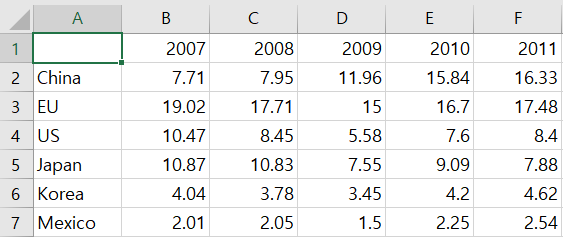

In [ ]:
filename = 'vehicle_prod.csv'
df = pd.read_csv(filename)
df

,Unnamed: 0,2007,2008,2009,2010,2011
0,China,7.71,7.95,11.96,15.84,16.33
1,EU,19.02,17.71,15.00,16.70,17.48
2,US,10.47,8.45,5.58,7.60,8.40
3,Japan,10.87,10.83,7.55,9.09,7.88
4,Korea,4.04,3.78,3.45,4.20,4.62
5,Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
# Unnamed라 되어있는 컬럼명 변경
df.rename(columns = {"Unnamed: 0":"Country"},inplace = True)
df

,2007,2008,2009,2010,2011
Country,,,,,
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


### [참고] set_index()이용해 index 지정하기

In [ ]:
df.set_index('Country', inplace=True)
df

KeyError: ignored

### index 지정하고 읽어오기: index_col=0

In [ ]:
filename = '/content/vehicle_prod.csv'
df = pd.read_csv(filename, index_col = 0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


### 데이터 살펴보기(1): head(), tail(), info(), describe()

In [ ]:
# 디폴트 상위 5개값
df.head()

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62


### 데이터 살펴보기(2): columns, index

In [ ]:
# 상위 2개 행
df.head(2)

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48


In [ ]:
# 하위 3개 행
df.tail(3)

,2007,2008,2009,2010,2011
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
# 디폴트 하위 개 행
df.tail()

,2007,2008,2009,2010,2011
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
#데이터 df의 정보를 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, China to Mexico
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2007    6 non-null      float64
 1   2008    6 non-null      float64
 2   2009    6 non-null      float64
 3   2010    6 non-null      float64
 4   2011    6 non-null      float64
dtypes: float64(5)
memory usage: 288.0+ bytes


In [ ]:
# 요약 통계량 출력
df.describe()


,2007,2008,2009,2010,2011
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,9.020000,8.461667,7.506667,9.280000,9.541667
std,6.019661,5.557519,5.142621,5.935921,6.105887
min,2.010000,2.050000,1.500000,2.250000,2.540000
25%,4.957500,4.822500,3.982500,5.050000,5.435000
50%,9.090000,8.200000,6.565000,8.345000,8.140000
75%,10.770000,10.235000,10.857500,14.152500,14.347500
max,19.020000,17.710000,15.000000,16.700000,17.480000


### 데이터 살펴보기(3): min(), max(), median(), mean(), std(), var(), sum()

In [ ]:
print('min',df.min())  #  1열의 최솟값
print('max',df.max())  # 1열의 최댓값
print('sum',df.sum())  # 1열의 데이터 총 합

min 2007    2.01
2008    2.05
2009    1.50
2010    2.25
2011    2.54
dtype: float64
max 2007    19.02
2008    17.71
2009    15.00
2010    16.70
2011    17.48
dtype: float64
sum 2007    54.12
2008    50.77
2009    45.04
2010    55.68
2011    57.25
dtype: float64


### 데이터 살펴보기(2: columns, index)

In [ ]:
# 인덱스 오름차순으로 정렬
df.index

Index(['China', 'EU', 'US', 'Japan', 'Korea', 'Mexico'], dtype='object')

In [ ]:
# 열 오름차순으로 정렬
df.columns

Index(['2007', '2008', '2009', '2010', '2011'], dtype='object')

In [ ]:
# 인덱스를 실제 리스트에 표기된 순서대로 정렬
df.index.tolist()

['China', 'EU', 'US', 'Japan', 'Korea', 'Mexico']

In [ ]:
# 열을 실제 리스트에 표기된 순서대로 정렬
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [ ]:
df['2007']

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64

In [ ]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

### 열(column) 생성

In [ ]:
# total 컬럼 생성
df['total'] = df.sum(axis = 1)
df

,2007,2008,2009,2010,2011,total
China,7.71,7.95,11.96,15.84,16.33,59.79
EU,19.02,17.71,15.00,16.70,17.48,85.91
US,10.47,8.45,5.58,7.60,8.40,40.50
Japan,10.87,10.83,7.55,9.09,7.88,46.22
Korea,4.04,3.78,3.45,4.20,4.62,20.09
Mexico,2.01,2.05,1.50,2.25,2.54,10.35


In [ ]:
# mean 컬럼 생성(이전에 생성한 total을 제외시켜야 하므로 일일히 씀)
df['mean'] = df[['2007','2008','2009','2010','2011']].mean(axis = 1)
df

,2007,2008,2009,2010,2011,total,mean
China,7.71,7.95,11.96,15.84,16.33,59.79,11.958
EU,19.02,17.71,15.00,16.70,17.48,85.91,17.182
US,10.47,8.45,5.58,7.60,8.40,40.50,8.100
Japan,10.87,10.83,7.55,9.09,7.88,46.22,9.244
Korea,4.04,3.78,3.45,4.20,4.62,20.09,4.018
Mexico,2.01,2.05,1.50,2.25,2.54,10.35,2.070


In [ ]:
# 같은 표현
# loc : 인덱스 기준으로 행 데이터 읽기
# iloc : 행 번호를 기준으로 행 데이터 읽기
# 행번호와 인덱스는 다르다. 행번호는 무조건 0 1 2 3,,, 인덱스는 1 3 5 6 7 같은 것 가능
df['mean'] = df.loc[:, '2007':'2011'].mean(axis = 1)
df

,2007,2008,2009,2010,2011,total,mean
China,7.71,7.95,11.96,15.84,16.33,59.79,11.958
EU,19.02,17.71,15.00,16.70,17.48,85.91,17.182
US,10.47,8.45,5.58,7.60,8.40,40.50,8.100
Japan,10.87,10.83,7.55,9.09,7.88,46.22,9.244
Korea,4.04,3.78,3.45,4.20,4.62,20.09,4.018
Mexico,2.01,2.05,1.50,2.25,2.54,10.35,2.070


In [ ]:
df['mean'] = df.iloc[:,:5].mean(axis = 1)
df

,2007,2008,2009,2010,2011,total,mean
China,7.71,7.95,11.96,15.84,16.33,59.79,11.958
EU,19.02,17.71,15.00,16.70,17.48,85.91,17.182
US,10.47,8.45,5.58,7.60,8.40,40.50,8.100
Japan,10.87,10.83,7.55,9.09,7.88,46.22,9.244
Korea,4.04,3.78,3.45,4.20,4.62,20.09,4.018
Mexico,2.01,2.05,1.50,2.25,2.54,10.35,2.070


In [ ]:
# row나 column을 삭제하기
df.drop('2008',axis = 1, inplace = True)
df


KeyError: ignored

In [ ]:
df.drop('Mexico',inplace = True)
df

,2007,2009,2010,2011,total,mean
China,7.71,11.96,15.84,16.33,59.79,11.958
EU,19.02,15.00,16.70,17.48,85.91,17.182
US,10.47,5.58,7.60,8.40,40.50,8.100
Japan,10.87,7.55,9.09,7.88,46.22,9.244
Korea,4.04,3.45,4.20,4.62,20.09,4.018


# 실습 1

## (1) 국가별 자동차 생산대수 데이터셋을 가져와서 데이터프레임을 생성하고 연도별 생산대수의 합을 다음과 같이 'total'이라는 이름의 행으로 가장 아래 행에 출력하시오.

힌트: 데이터 프레임에서 국가명을 제외한 숫자의 합을 구하는 메소드로 *select_dtypes(np.number).sum().rename()* 사용

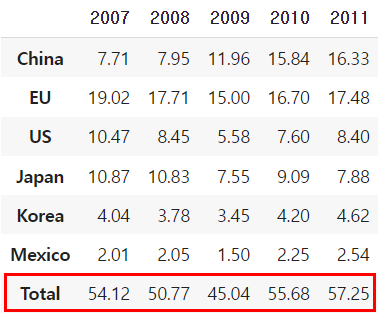

In [9]:
filename = 'vehicle_prod.csv'
df = pd.read_csv(filename, index_col = 0)
df.loc['Total'] = df.sum()  # df.sum(axis = 0)
df

FileNotFoundError: ignored

In [8]:
df.drop('Total', inplace = True)
df

NameError: ignored

In [ ]:
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


In [ ]:
df['구분'] = ['a','b','c','d','e','f']
df

,2007,2008,2009,2010,2011,구분
China,7.71,7.95,11.96,15.84,16.33,a
EU,19.02,17.71,15.00,16.70,17.48,b
US,10.47,8.45,5.58,7.60,8.40,c
Japan,10.87,10.83,7.55,9.09,7.88,d
Korea,4.04,3.78,3.45,4.20,4.62,e
Mexico,2.01,2.05,1.50,2.25,2.54,f


In [ ]:
df.loc['Total'] = df.sum()
df

,2007,2008,2009,2010,2011,구분
China,7.71,7.95,11.96,15.84,16.33,a
EU,19.02,17.71,15.00,16.70,17.48,b
US,10.47,8.45,5.58,7.60,8.40,c
Japan,10.87,10.83,7.55,9.09,7.88,d
Korea,4.04,3.78,3.45,4.20,4.62,e
Mexico,2.01,2.05,1.50,2.25,2.54,f
Total,54.12,50.77,45.04,55.68,57.25,abcdef


In [ ]:
df.drop('Total',inplace = True)
df

,2007,2008,2009,2010,2011,구분
China,7.71,7.95,11.96,15.84,16.33,a
EU,19.02,17.71,15.00,16.70,17.48,b
US,10.47,8.45,5.58,7.60,8.40,c
Japan,10.87,10.83,7.55,9.09,7.88,d
Korea,4.04,3.78,3.45,4.20,4.62,e
Mexico,2.01,2.05,1.50,2.25,2.54,f


In [6]:
import numpy as np
df.loc['Total'] = df.select_dtypes(np.number).sum()
df

NameError: ignored

In [ ]:
data = df.select_dtypes(np.number).sum()
data

2007    108.24
2008    101.54
2009     90.08
2010    111.36
2011    114.50
dtype: float64

In [ ]:
total_df = pd.DataFrame([data],columns = df.columns, index = ['Total'])
total_df

,2007,2008,2009,2010,2011,구분
Total,108.24,101.54,90.08,111.36,114.5,NaN


In [ ]:
df = df.append(total_df)
df

,2007,2008,2009,2010,2011,구분
China,7.71,7.95,11.96,15.84,16.33,a
EU,19.02,17.71,15.00,16.70,17.48,b
US,10.47,8.45,5.58,7.60,8.40,c
Japan,10.87,10.83,7.55,9.09,7.88,d
Korea,4.04,3.78,3.45,4.20,4.62,e
Mexico,2.01,2.05,1.50,2.25,2.54,f
Total,54.12,50.77,45.04,55.68,57.25,NaN
Total,108.24,101.54,90.08,111.36,114.50,NaN


## (2) 다음의 시리즈를 사용하여 KNU 상점 월별 수익과 지출을 나타내는 DataFrame을 생성하시오.
```
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

	월	수익	지출
0	1월	9500	5040
1	2월	6200	2350
2	3월	6050	2300
3	4월	7000	4800
```







In [ ]:
month_se = pd.Series(['1월','2월','3월','4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])


In [ ]:
df = pd.DataFrame({'월':month_se, '수익':income_se, '지출':expenses_se})
df

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [ ]:
df1 = pd.DataFrame(columns = ['월','수익','지출'])
df1

,월,수익,지출


In [ ]:
df1['월'] = month_se
df1['수익'] = income_se
df1['지출'] = expenses_se
df1

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


In [ ]:
df2 = pd.DataFrame([month_se, income_se, expenses_se],['월','수익','지출'])
df2

,0,1,2,3
월,1월,2월,3월,4월
수익,9500,6200,6050,7000
지출,5040,2350,2300,4800


In [ ]:
df2.T

,월,수익,지출
0,1월,9500,5040
1,2월,6200,2350
2,3월,6050,2300
3,4월,7000,4800


## (3) 문제 2의 DataFrame 을 이용하여 KNU 상점의 1월부터 4월까지의 월 매출의 합과 월 지출의 합을 출력하시오.

힌트: 쉼표 구분자를 출력하는 출력 formatter 사용

In [ ]:
df.describe()

,수익,지출
count,4.000000,4.000000
mean,7187.500000,3622.500000
std,1597.067625,1501.563074
min,6050.000000,2300.000000
25%,6162.500000,2337.500000
50%,6600.000000,3575.000000
75%,7625.000000,4860.000000
max,9500.000000,5040.000000


In [ ]:
print(f'상점의 수익 합계: {df["수익"].sum():,}')
print(f'상점의 지출 합계: {df["지출"].sum():,}')


상점의 수익 합계: 28,750
상점의 지출 합계: 14,490


# 5.결측치 처리

### 데이터 읽어오기 - Titanic


- PassengerId : 승객 아이디(여기서는 일련번호)
- Survived : 생존=1, 죽음=0
- Pclass : 승객 등급. 1등급=1, 2등급=2, 3등급=3
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓 번호
- Fare : 티켓 요금
- Cabin : 선실 번호
- Embarked : 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

In [10]:
filename = '/content/titanic.csv'
df = pd.read_csv(filename)
df1 = df.copy(filename)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# 결측값 여부 확인
df1.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결측치가 있는 행 삭제: dropna()

In [14]:
df1.dropna(inplace = True)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [15]:
df1.count()

PassengerId    183
Survived       183
Pclass         183
Name           183
Sex            183
Age            183
SibSp          183
Parch          183
Ticket         183
Fare           183
Cabin          183
Embarked       183
dtype: int64

### 결측치가 있는 열 모두 삭제: dropna(axis=1)

In [16]:
df2 = df.copy()
df2.dropna(axis=1, inplace = True)
df2

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [17]:
df2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare'],
      dtype='object')

본격적으로 문제를 해결해 보자
- Cabin은 결측치가 너무 많으므로 Cabin만 삭제하자.
- Age는 평균값으로 채워 넣고
- Embarked는 결측치가 2개인데 어떤 값으로 채워넣을지 전략을 세워보자 (승선장소가 빈도가 가장 높은 곳을 찾아서 그곳으로 채워넣음 - 애리 전략)

In [18]:
df3 = df.copy()
df3.drop('Cabin',axis=1,inplace = True)
df3.columns

### 결측치를 평균값으로 대체: fillna()

In [19]:
df3['Age'].fillna(df3['Age'].mean(),inplace = True)
df3['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [20]:
df3['Age'].isna().sum()

0

In [22]:
df3[df3['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [25]:
# value_counts() >> 중복 요소 수 세기
df3['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df3['Embarked'].value_counts().idxmax()

'S'

In [29]:
df3['Embarked'].fillna(df3['Embarked'].value_counts().idxmax(), inplace = True)

In [31]:
df3['Embarked'].isna().sum()

0

In [32]:
df3.iloc[[62,829]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.475,C83,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.000,B28,S


# 6.중복데이터 처리

In [33]:
df = pd.DataFrame({'A' : ['a','a','b','a','b'],
                   'B' : [1,1,1,2,2],
                   'C': [1,1,2,2,2]})
df

,A,B,C
0,a,1,1
1,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [34]:
df.duplicated()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [35]:
df.drop_duplicates(inplace=True)

In [36]:
df

,A,B,C
0,a,1,1
2,b,1,2
3,a,2,2
4,b,2,2


In [37]:
df['A'].duplicated()

0    False
2    False
3     True
4     True
Name: A, dtype: bool

# 실습 2 (시간 많이 걸림. 20분 줌)

2010년부터 10여년간 울릉도 지역의 기온과 바람 세기를 측정한 데이터셋을 이용한 기상데이터 분석

## (1) weather.csv 파일을 읽어와서 처음 3행과 shape을 출력하시오.

주의: 한글 인코딩 encoding='CP949' 또는 'utf-8'

In [4]:
weather_file = "/content/weather.csv"
df = pd.read_csv(weather_file,encoding = 'cp949')
df.head(3)

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9


In [5]:
df.shape

(3653, 4)

## (2) 평균기온, 최대풍속, 평균풍속의 평균과 표준편차를 출력하시오.


```
평균
---------------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441

표준편차
---------------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
```



In [6]:
df.describe()

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [7]:
print('평균')
print('-------------------')
print(df.mean())
print('-------------------')
print('표준편차')
print('-------------------')
print(df.std())
print('-------------------')

평균
-------------------
평균기온    12.942102
최대풍속     7.911099
평균풍속     3.936441
dtype: float64
-------------------
표준편차
-------------------
평균기온    8.538507
최대풍속    3.029862
평균풍속    1.888473
dtype: float64
-------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys


## (3) 전체 데이터에 대하여 최대풍속과 평균풍속의 최대값을 출력하시오.


```
최대풍속의 최대값    26.0
평균풍속의 최대값    14.9
```



In [8]:
print('최대 풍속의 최대값:',df['최대풍속'].max())
print('평균 풍속의 최대값:',df['평균풍속'].max())

최대 풍속의 최대값: 26.0
평균 풍속의 최대값: 14.9


## (4) 평균풍속의 결측치를 출력하시오.

힌트: isna(), isnull()

In [9]:
df['평균풍속'].isna().sum()

6

In [10]:
df[df['평균풍속'].isna()]

,일시,평균기온,최대풍속,평균풍속
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN
1694,2015-03-22,10.1,11.6,NaN
1704,2015-04-01,7.3,12.1,NaN
3182,2019-04-18,15.7,11.7,NaN


## (5) 결측치가 있는 행들을 삭제하시오.

힌트: dropna()

In [11]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

일시      0
평균기온    0
최대풍속    0
평균풍속    0
dtype: int64

## (6) 평균풍속의 결측치를 평균값으로 채우고 원본데이터를 수정하시오.

힌트: fillna()

In [15]:
weather_file = "/content/weather.csv"
df = pd.read_csv(weather_file, index_col = 0,encoding = 'cp949')

## (7) 2015년 6월 6일의 울릉도 평균 기온과 풍속 정보를 다음과 같이 확인해 보시오.


```
평균기온    16.6
최대풍속     4.4
평균풍속     1.9
Name: 2015-06-06, dtype: float64
```



In [16]:
df.head()

,평균기온,최대풍속,평균풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6


In [17]:
df

,평균기온,최대풍속,평균풍속
일시,,,
2010-08-01,28.7,8.3,3.4
2010-08-02,25.2,8.7,3.8
2010-08-03,22.1,6.3,2.9
2010-08-04,25.3,6.6,4.2
2010-08-05,27.2,9.1,5.6
...,...,...,...
2020-07-27,22.1,4.2,1.7
2020-07-28,21.9,4.5,1.6
2020-07-29,21.6,3.2,1.0


In [18]:
# 인덱스를 기준으로 행 데이터 추출
print(df.loc['2015-06-06'])

평균기온    16.6
최대풍속     4.4
평균풍속     1.9
Name: 2015-06-06, dtype: float64


## (8) 가장 무더웠던 날이 언제이고, 이 날의 평균기온, 평균풍속, 최대풍속은 얼마였는지 확인하시오.

힌트 1: 
*weather[weather[‘평균기온’] == weather[‘평균기온’].max()]*로 데이터에 접근합니다.

힌트 2: *idxmax()*를 사용합니다(이전 버전에서는 *argmax()*)

In [19]:
df['평균기온'] == df['평균기온'].max()

일시
2010-08-01    False
2010-08-02    False
2010-08-03    False
2010-08-04    False
2010-08-05    False
              ...  
2020-07-27    False
2020-07-28    False
2020-07-29    False
2020-07-30    False
2020-07-31    False
Name: 평균기온, Length: 3653, dtype: bool

In [23]:
df[df['평균기온'] == df['평균기온'].max()]

,평균기온,최대풍속,평균풍속
일시,,,
2013-08-08,31.3,7.8,4.6


## (9) 울릉도의 평균기온은 30도를 넘는 날들을 찾아, 이날의 기상 데이터를 나열하시오.

In [24]:
df[df['평균기온']>30]

,평균기온,최대풍속,평균풍속
일시,,,
2013-08-08,31.3,7.8,4.6
2013-08-09,30.6,9.9,6.4
2013-08-10,30.6,7.4,3.8
2018-07-23,30.5,6.5,1.6
2018-08-04,30.3,5.8,3.0


# 7.시계열 자료 분석
시계열(Time Series) 데이터는 시간의 흐름에 따라 순차적으로 관측한 값들의 집합

시계열 데이터를 효과적으로 인덱싱하는 클래스 DatatimeIndex를 제공


### DatetimeIndex()

In [25]:
import pandas as pd

d_list = ["02/07/2022","02-07-2022","2022-02-07","2022/02/07"]
date_data = pd.DatetimeIndex(d_list)
print(date_data)
print(type(date_data))

DatetimeIndex(['2022-02-07', '2022-02-07', '2022-02-07', '2022-02-07'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [27]:
date_data.year

Int64Index([2022, 2022, 2022, 2022], dtype='int64')

In [28]:
date_data.month

Int64Index([2, 2, 2, 2], dtype='int64')

In [30]:
date_data.day

Int64Index([7, 7, 7, 7], dtype='int64')

In [31]:
d_list = ["01.26.2022 10:00:00", "02-18-2022 17:30:00"]
pd.DatetimeIndex(d_list)

DatetimeIndex(['2022-01-26 10:00:00', '2022-02-18 17:30:00'], dtype='datetime64[ns]', freq=None)

In [32]:
pd.DatetimeIndex(d_list).hour

Int64Index([10, 17], dtype='int64')

In [33]:
pd.DatetimeIndex(d_list).minute

Int64Index([0, 30], dtype='int64')

In [34]:
pd.DatetimeIndex(d_list).second

Int64Index([0, 0], dtype='int64')

### to_datetime()

문자열(object)을 datetime64 타입으로 변경

In [35]:
d_list = ["02/07/2022","02-07-2022","2022-02-07","2022/02/07"]
pd.to_datetime(d_list)

DatetimeIndex(['2022-02-07', '2022-02-07', '2022-02-07', '2022-02-07'], dtype='datetime64[ns]', freq=None)

In [36]:
d_list = ["01.26.2022 10:00:00", "02-18-2022 17:30:00"]
pd.to_datetime(d_list)

DatetimeIndex(['2022-01-26 10:00:00', '2022-02-18 17:30:00'], dtype='datetime64[ns]', freq=None)

### 날짜/시간과 관계된 재미있는 것들

In [40]:
df = pd.DataFrame({'DateTime':['2022-01-26 10:00:00','2022-02-18 17:30:00']})
df


,DateTime
0,2022-01-26 10:00:00
1,2022-02-18 17:30:00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


In [43]:
df['DateTime'] = pd.to_datetime(df['DateTime'],format='%Y-%m-%d %H:%M:%S')
df

,DateTime
0,2022-01-26 10:00:00
1,2022-02-18 17:30:00


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  2 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


In [45]:
df['date']=df['DateTime'].dt.date #YYYY-MM-DD 문자
df['year']=df['DateTime'].dt.year #YYYY연 숫자
df['month']=df['DateTime'].dt.month #월 숫자
df['month_name']=df['DateTime'].dt.month_name() #월 문자
df['day']=df['DateTime'].dt.day #일 숫자
df['time']=df['DateTime'].dt.time #HH:MM:SS 문자
df['hour']=df['DateTime'].dt.hour #시 숫자
df['minute']=df['DateTime'].dt.minute #분 숫자
df['second']=df['DateTime'].dt.second #초 숫자
df

,DateTime,date,year,month,month_name,day,time,hour,minute,second
0,2022-01-26 10:00:00,2022-01-26,2022,1,January,26,10:00:00,10,0,0
1,2022-02-18 17:30:00,2022-02-18,2022,2,February,18,17:30:00,17,30,0


In [46]:
df['quarter']=df['DateTime'].dt.quarter #분기 숫자
df['weekday_name']=df['DateTime'].dt.day_name() #요일이름 문자
df['weekday']=df['DateTime'].dt.weekday #요일 숫자 0-일
df['weekofyear']=df['DateTime'].dt.isocalendar().week #연 기준 몇 주차 인지 숫자
df['dayofyear']=df['DateTime'].dt.dayofyear #연 기준 몇일째 숫자
df['days_in_month']=df['DateTime'].dt.days_in_month #월 일수 숫자
df['is_leap_year'] = df['DateTime'].dt.is_leap_year     # 윤년 여부
df

,DateTime,date,year,month,month_name,day,time,hour,minute,second,quarter,weekday_name,weekday,weekofyear,dayofyear,days_in_month,is_leap_year
0,2022-01-26 10:00:00,2022-01-26,2022,1,January,26,10:00:00,10,0,0,1,Wednesday,2,4,26,31,False
1,2022-02-18 17:30:00,2022-02-18,2022,2,February,18,17:30:00,17,30,0,1,Friday,4,7,49,28,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       2 non-null      datetime64[ns]
 1   date           2 non-null      object        
 2   year           2 non-null      int64         
 3   month          2 non-null      int64         
 4   month_name     2 non-null      object        
 5   day            2 non-null      int64         
 6   time           2 non-null      object        
 7   hour           2 non-null      int64         
 8   minute         2 non-null      int64         
 9   second         2 non-null      int64         
 10  quarter        2 non-null      int64         
 11  weekday_name   2 non-null      object        
 12  weekday        2 non-null      int64         
 13  weekofyear     2 non-null      UInt32        
 14  dayofyear      2 non-null      int64         
 15  days_in_month  2 non-null  

# 8.그룹핑: groupby()
특정한 값을 기반으로 데이터를 그룹으로 묶음

In [48]:
weather = pd.read_csv('weather.csv', encoding = 'cp949')
weather

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [49]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [52]:
# 일시에서 월만 빼내애서 새로운 컬럼 생성
weather['월'] = pd.DatetimeIndex(weather['일시']).month
weather

,일시,평균기온,최대풍속,평균풍속,월
0,2010-08-01,28.7,8.3,3.4,8
1,2010-08-02,25.2,8.7,3.8,8
2,2010-08-03,22.1,6.3,2.9,8
3,2010-08-04,25.3,6.6,4.2,8
4,2010-08-05,27.2,9.1,5.6,8
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,7
3649,2020-07-28,21.9,4.5,1.6,7
3650,2020-07-29,21.6,3.2,1.0,7
3651,2020-07-30,22.9,9.7,2.4,7


In [55]:
monthly_means = weather.groupby('월').mean()
monthly_means

,평균기온,최대풍속,평균풍속
월,,,
1,1.598387,8.158065,3.757419
2,2.136396,8.225357,3.946786
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355
6,19.616667,6.945667,3.461000
7,23.328387,7.322581,3.877419
8,24.748710,6.853226,3.596129
9,20.323667,6.896333,3.661667


In [56]:
monthly_means['평균풍속'] >= 4.0

월
1     False
2     False
3      True
4      True
5      True
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: 평균풍속, dtype: bool

In [57]:
monthly_means[monthly_means['평균풍속'] >= 4.0]

,평균기온,최대풍속,평균풍속
월,,,
3,6.250323,8.871935,4.390291
4,11.064667,9.305017,4.622483
5,16.564194,8.548710,4.219355


# 9.데이터 구조 변경: pivot()

In [58]:
df = pd.DataFrame({'상품' : ['시계', '반지', '반지', '목걸이', '팔찌'],
                   '재질' : ['금', '은', '백금', '금', '은'],
                   '가격' : [500000, 20000, 350000, 300000, 60000]})
df

,상품,재질,가격
0,시계,금,500000
1,반지,은,20000
2,반지,백금,350000
3,목걸이,금,300000
4,팔찌,은,60000


In [59]:
new_df = df.pivot( index = '상품', columns = '재질', values = '가격')
new_df

재질,금,백금,은
상품,,,
목걸이,300000.0,NaN,NaN
반지,NaN,350000.0,20000.0
시계,500000.0,NaN,NaN
팔찌,NaN,NaN,60000.0


In [61]:
new_df.isnull().sum()

재질
금     2
백금    3
은     2
dtype: int64

In [62]:
new_df.fillna(0)

재질,금,백금,은
상품,,,
목걸이,300000.0,0.0,0.0
반지,0.0,350000.0,20000.0
시계,500000.0,0.0,0.0
팔찌,0.0,0.0,60000.0


# 10.DataFrame 합치기
pd.concate() 연결
pd.merge()는 공통의 열을 기준으로 두 데이터프레임을 합쳐준다. sql에서 join과 같은 역할이다.

left : 왼쪽 데이터프레임

right : 오른쪽 데이터프레임

on : (두 데이터프레임의 기준열 이름이 같을 때) 기준열

how : 조인 방식 {'left', 'right', 'inner', 'outer'} 기본값은 'inner'
 
left_on : 기준열 이름이 다를 때, 왼쪽 기준열

right_on : 기준열 이름이 다를 때, 오른쪽 기준열

### Series->Series: concat()

In [63]:
A = pd.Series(['a0','a1','a2','a3'], name = 'a')
B = pd.Series(['b0','b1','b2'], name = 'b', index = [3,4,5])
C = pd.Series(['c0','c1','c2','c3'], name = 'c')
print(A)
print(B)
print(C)

0    a0
1    a1
2    a2
3    a3
Name: a, dtype: object
3    b0
4    b1
5    b2
Name: b, dtype: object
0    c0
1    c1
2    c2
3    c3
Name: c, dtype: object


### Series->DataFrame: concat()

In [65]:
pd.concat([A,B])  # axis = 0

0    a0
1    a1
2    a2
3    a3
3    b0
4    b1
5    b2
dtype: object

In [ ]:
type(pd.concat([A,B]))

In [66]:
# 위아래로 붙임 
pd.concat([A,C])

0    a0
1    a1
2    a2
3    a3
0    c0
1    c1
2    c2
3    c3
dtype: object

In [67]:
# 좌우로 붙임
pd.concat([A,C],axis = 1)

,a,c
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3


In [68]:
type(pd.concat([A,C],axis = 1))

pandas.core.frame.DataFrame

In [69]:
pd.concat([A,B],axis = 1)

,a,b
0,a0,NaN
1,a1,NaN
2,a2,NaN
3,a3,b0
4,NaN,b1
5,NaN,b2


### DataFrame->DataFrame: concat()

In [70]:
df1 = pd.DataFrame({'a':['a0','a1','a2'],
                    'b':['b0','b1','b2'],
                    'c':['c0','c1','c2']},
                    index=[0,1,2])
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2


In [71]:
df2 = pd.DataFrame({'b':['b2','b3','b4'],
                    'c':['c2','c31','c4'],
                    'd':['d2','d3','d4']},
                    index=[1,2,3])
df2

,b,c,d
1,b2,c2,d2
2,b3,c31,d3
3,b4,c4,d4


In [72]:
pd.concat([df1,df2])

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
1,NaN,b2,c2,d2
2,NaN,b3,c31,d3
3,NaN,b4,c4,d4


In [73]:
pd.concat([df1,df2],ignore_index = True)

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b2,c2,d2
4,NaN,b3,c31,d3
5,NaN,b4,c4,d4


In [74]:
pd.concat([df1,df2],axis = 1,join='inner')

,a,b,c,b,c,d
1,a1,b1,c1,b2,c2,d2
2,a2,b2,c2,b3,c31,d3


In [75]:
pd.concat([df1,df2],axis = 1, join = 'outer')

,a,b,c,b,c,d
0,a0,b0,c0,NaN,NaN,NaN
1,a1,b1,c1,b2,c2,d2
2,a2,b2,c2,b3,c31,d3
3,NaN,NaN,NaN,b4,c4,d4


### DataFrame->DataFrame: merge()

In [76]:
df_1 = pd.DataFrame({'A':['a10','a11','a12'],
                     'B':['b10','b11','b12'],
                     'C':['c10','c11','c12']},
                     index=['가','나','다'])
df_1

,A,B,C
가,a10,b10,c10
나,a11,b11,c11
다,a12,b12,c12


In [77]:
df_2 = pd.DataFrame({'B':['b23','b24','b25'],
                     'C':['c23','c24','c25'],
                     'D':['d23','d24','d25']},
                     index=['다','라','마'])

df_2

,B,C,D
다,b23,c23,d23
라,b24,c24,d24
마,b25,c25,d25


In [78]:
df_3 = df_1.merge(df_2, how='outer',on="B")
df_3

,A,B,C_x,C_y,D
0,a10,b10,c10,NaN,NaN
1,a11,b11,c11,NaN,NaN
2,a12,b12,c12,NaN,NaN
3,NaN,b23,NaN,c23,d23
4,NaN,b24,NaN,c24,d24
5,NaN,b25,NaN,c25,d25


In [79]:
df_3 = df_1.merge(df_2, how='outer',on=["B","C"])
df_3

,A,B,C,D
0,a10,b10,c10,NaN
1,a11,b11,c11,NaN
2,a12,b12,c12,NaN
3,NaN,b23,c23,d23
4,NaN,b24,c24,d24
5,NaN,b25,c25,d25


In [80]:
df_3 = df_1.merge(df_2, how='outer',left_index=True,right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


In [81]:
df_3 = df_1.merge(df_2, how='inner',left_index=True,right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
다,a12,b12,c12,b23,c23,d23


In [82]:
df_3 = df_1.merge(df_2, how='left',left_index=True,right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
가,a10,b10,c10,NaN,NaN,NaN
나,a11,b11,c11,NaN,NaN,NaN
다,a12,b12,c12,b23,c23,d23


In [83]:
df_3 = df_1.merge(df_2, how='right',left_index=True,right_index=True)
df_3

,A,B_x,C_x,B_y,C_y,D
다,a12,b12,c12,b23,c23,d23
라,NaN,NaN,NaN,b24,c24,d24
마,NaN,NaN,NaN,b25,c25,d25


### left_on

# 실습 3

## (1) *np.random.randint(0, 100, size=5)*와 같은 코드를 통해 0에서 100범위의 정수를 5개 생성할 수 있다. 이 숫자들을 'a','b','c','d','e' 인덱스를 가지는 num_series라는 시리즈의 데이터 값으로 넣어서 출력하시오. 

단, 넘파이 난수 생성 시 씨드값은 85입니다.


```
예)
a    32
b    13
c    68
d    51
e    13
dtype: int64
```



In [84]:
import numpy as np

np.random.seed(85)
n = pd.Series(np.random.randint(0,100, size=5),index=['a','b','c','d','e'])
n

a    32
b    13
c    68
d    51
e    13
dtype: int64

### 이 num_series 의 최대값을 출력하시오.

In [85]:
n.max()

68

### 이 num_series 의 최소값을 출력하시오.

In [86]:
n.min()

13

### 이 num_series 의 평균값을 출력하시오.

In [87]:
n.mean()

35.4

## (2) 다음과 같은 2개의 데이터프레임을 DataFrame 클래스를 이용하여 생성하시오. 

데이터프레임의 이름은 df_1, df_2로 합니다


```
df_1                          df2
    A   B   C   D                 B   C   D   E
0  A0  B0  C0  D0             0  B2  C2  D2  E2
1  A1  B1  C1  D1             1  B3  C3  D3  E3
2  A2  B2  C2  D2
```



In [89]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2'],
                     'C': ['C0', 'C1', 'C2'],
                     'D': ['D0', 'D1', 'D2']})
print(df1)

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2


In [88]:
df2 = pd.DataFrame({'B': ['B2', 'B3'],
                    'C': ['C2', 'C3'],
                    'D': ['D2', 'D3'],
                    'E': ['E2', 'E3']})
print(df2)

    B   C   D   E
0  B2  C2  D2  E2
1  B3  C3  D3  E3


두 데이터프레인을 concat() 함수를 사용하여 아래와 같이 결합하고 출력하세요    

```
1)
A   B   C   D    E
0   A0  B0  C0  D0  NaN
1   A1  B1  C1  D1  NaN
2   A2  B2  C2  D2  NaN
0  NaN  B2  C2  D2   E2
1  NaN  B3  C3  D3   E3

2)
    A   B   C   D   B   C   D   E
0  A0  B0  C0  D0  B2  C2  D2  E2
1  A1  B1  C1  D1  B3  C3  D3  E3
```



In [90]:
pd.concat([df1, df2], join='outer')

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
0,NaN,B2,C2,D2,E2
1,NaN,B3,C3,D3,E3


In [91]:
pd.concat([df1, df2], join='inner', axis=1)

,A,B,C,D,B,C,D,E
0,A0,B0,C0,D0,B2,C2,D2,E2
1,A1,B1,C1,D1,B3,C3,D3,E3


# 10.DataFrame 시각화

In [95]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

한글깨짐 처리

In [96]:
# 나눔바른고딕 폰트 설치 - 런타임 연결이 다시 될 때마다 다시 폰트를 설치해야 한글이 보입니다.
!apt-get install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-comp

In [97]:
# 한글폰트 설치하기 위해 필요함
import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
plt.rcParams['font.family'] = "NanumBarunGothic"

In [99]:
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

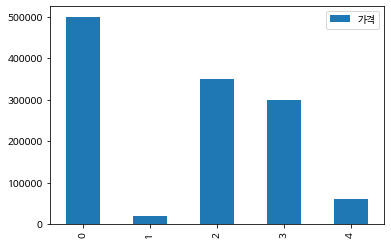

In [100]:
df.plot.bar()

In [101]:
file = '/content/vehicle_prod.csv'
df = pd.read_csv(file, index_col = 0)
df

,2007,2008,2009,2010,2011
China,7.71,7.95,11.96,15.84,16.33
EU,19.02,17.71,15.00,16.70,17.48
US,10.47,8.45,5.58,7.60,8.40
Japan,10.87,10.83,7.55,9.09,7.88
Korea,4.04,3.78,3.45,4.20,4.62
Mexico,2.01,2.05,1.50,2.25,2.54


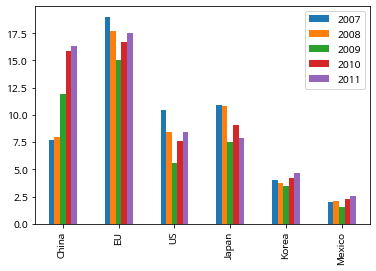

In [102]:
df.plot.bar()

In [104]:
# transpose : 행 열 바꾸기
df1 = df.transpose()
df1

,China,EU,US,Japan,Korea,Mexico
2007,7.71,19.02,10.47,10.87,4.04,2.01
2008,7.95,17.71,8.45,10.83,3.78,2.05
2009,11.96,15.00,5.58,7.55,3.45,1.50
2010,15.84,16.70,7.60,9.09,4.20,2.25
2011,16.33,17.48,8.40,7.88,4.62,2.54


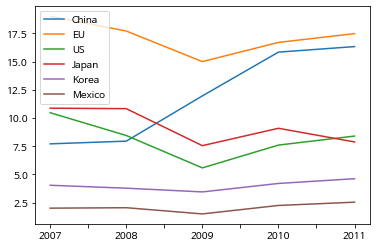

In [105]:
df1.plot.line()

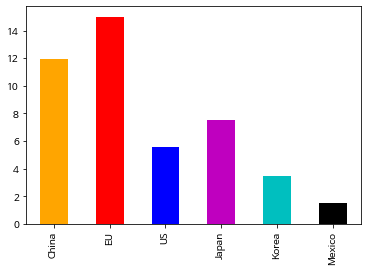

In [106]:
df['2009'].plot(kind='bar',color=('orange','r','b','m','c','k'))

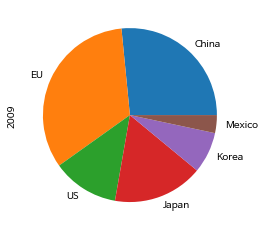

In [107]:
df['2009'].plot(kind='pie')